# Exploratory Data Analysis

Some introduction...

## Dataset Descriptions

### Users
This dataset contains information about the users in the system. It includes attributes such as user ID, name, age, and gender.

### Streams
The Streams dataset provides details about the different streams in the system. It includes information such as stream ID, stream name, and stream category.

### Post Reports
This dataset contains reports of posts made by users. It includes attributes such as post ID, user ID, report reason, and timestamp.

### Comments Reports
The Comments Reports dataset contains reports of comments made by users. It includes attributes such as comment ID, user ID, report reason, and timestamp.

### User Activity
The User Activity dataset captures the activity logs of users in the system. It includes attributes such as user ID, activity type, timestamp, and the normalized path of the activity.


## 1. Initial setup 

In [2]:
# install the requirements.txt
# ! pip install -r requirements.txt

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ----------------------------------- -- 153.6/162.8 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 3.2 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.4 MB/s eta 0:00:00
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
INFO: pip is looking at 

ERROR: Cannot install -r requirements.txt (line 5), -r requirements.txt (line 6) and visions[type-image-path]==0.7.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts



    pandas-profiling 3.0.0 depends on visions==0.7.1
    visions[type-image-path] 0.7.1 depends on visions 0.7.1 (from https://files.pythonhosted.org/packages/80/96/01e4ba22cef96ae5035dbcf0451c2f4f859f8f17393b98406b23f0034279/visions-0.7.1-py3-none-any.whl (from https://pypi.org/simple/visions/) (requires-python:>=3.6))
    ydata-profiling 4.1.0 depends on visions==0.7.5

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Needed Packages
import pandas as pd
import os
import numpy as np
from datetime import datetime
#from pandas_profiling import ProfileReport
#import ydata_profiling


# Visualization packages
import plotly.graph_objects as go
import plotly.express as px

# Display settings
import warnings
warnings.filterwarnings('ignore')
#%matplotlib widget

## 2. EDA for 'users' data set

In [14]:
# Users data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\BKPR_Datasets_Samples"
file_name = "users.xlsx"
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
print(data.info())
# print(f'The columns are: {data.columns}')
# data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9467 entries, 0 to 9466
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   first_login                   7499 non-null   object 
 1   review_status                 9467 non-null   object 
 2   provisioned_by_signin_method  9467 non-null   object 
 3   suspended                     9467 non-null   bool   
 4   streamid                      9466 non-null   float64
 5   timezone                      4700 non-null   object 
 6   id                            9467 non-null   object 
 7   confirmed                     9467 non-null   bool   
 8   password_needs_change         9467 non-null   bool   
 9   last_skipped_contact_details  7478 non-null   object 
 10  is_bot                        9467 non-null   bool   
 11  org_unit_ids                  9467 non-null   object 
 12  state                         9467 non-null   object 
 13  rol

state
suspended    7921
active       1494
created        52
Name: count, dtype: int64


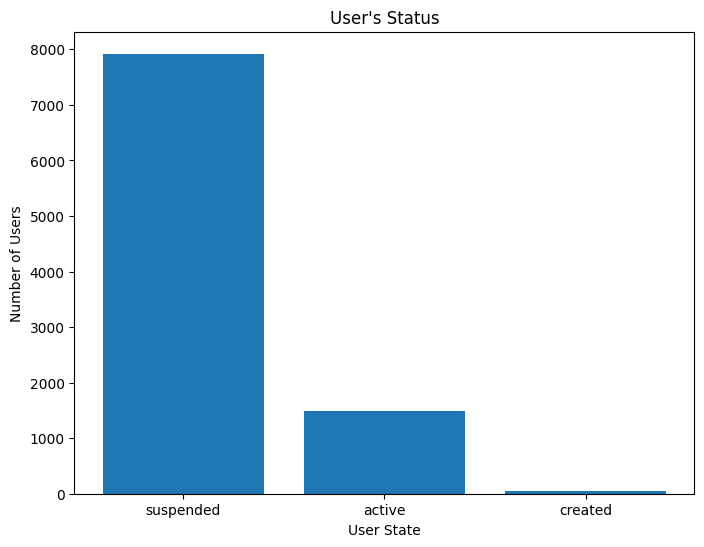

In [6]:
# Active Users by Department
df_users = data.copy()
# group by state 
print(df_users['state'].value_counts())

import matplotlib.pyplot as plt

# Active Users by Department
df_users = data.copy()
state_counts = df_users['state'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('User State')
plt.ylabel('Number of Users')
plt.title("User's Status")
plt.show()


In [7]:
df_users[df_users['id'] == "973511e1-3b2d-4ec6-87b3-7780269d3843"]

,first_login,review_status,provisioned_by_signin_method,suspended,streamid,timezone,id,confirmed,password_needs_change,last_skipped_contact_details,is_bot,org_unit_ids,state,role,avatar_anonymous,last_login,tenantuserid,updated,used,display_name_extension,suspended_at,notifications,beta,email_confirmed,anonymous,is_beekeeper_aware,notifications_public,digest_mails,language,created,mobile_confirmed,push,accepted_coc,last_skipped_password,department,location,position


In [274]:
# Keep only not suspended users
df_users_active = df_users[df_users['state'] == 'active']
print(df_users_active.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, 0 to 1545
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   first_login                   1494 non-null   object 
 1   review_status                 1494 non-null   object 
 2   provisioned_by_signin_method  1494 non-null   object 
 3   suspended                     1494 non-null   bool   
 4   streamid                      1494 non-null   float64
 5   timezone                      895 non-null    object 
 6   id                            1494 non-null   object 
 7   confirmed                     1494 non-null   bool   
 8   password_needs_change         1494 non-null   bool   
 9   last_skipped_contact_details  1487 non-null   object 
 10  is_bot                        1494 non-null   bool   
 11  org_unit_ids                  1494 non-null   object 
 12  state                         1494 non-null   object 
 13  role    

In [8]:
# Preprocessing users data function

def preprocess_users(df_users):  
    # Keep only not suspended users
    df_users_active = df_users[df_users['state'] == 'active']
  
    # Imputation of missing values
    # Language 
    df_users_active['language'].fillna('en', inplace=True)

    # Delete columns
    # Columns to be deleted
    cols_to_delete = ['suspended_at', 'avatar_anonymous', 'last_skipped_password', 'review_status', 'suspended',
                    'push', 'mobile_confirmed', 'anonymous','provisioned_by_signin_method','beta','is_beekeeper_aware',
                    'is_bot','streamid','password_needs_change','confirmed']    
    df_users_active.drop(cols_to_delete, axis=1, inplace=True)
    
    # Convert to datetime
    df_users_active['first_login'] = pd.to_datetime(df_users_active['first_login'])
    df_users_active['last_skipped_contact_details'] = pd.to_datetime(df_users_active['last_skipped_contact_details'])
    df_users_active['last_login'] = pd.to_datetime(df_users_active['last_login'])
    df_users_active['updated'] = pd.to_datetime(df_users_active['updated'])
    df_users_active['used'] = pd.to_datetime(df_users_active['used'])
    df_users_active['created'] = pd.to_datetime(df_users_active['created'])
    df_users_active['accepted_coc'] = pd.to_datetime(df_users_active['accepted_coc'])

    # date range of posts
    print("The date range of users based on the creation date:")
    print(f"Min date: {df_users_active['created'].min()}")
    print(f"Max date: {df_users_active['created'].max()}")
    #print(f"Date range: {df_users_active['created'].max() - df_users_active['created'].min()}")
    
    
    return df_users_active

df_users_active = preprocess_users(df_users)

The date range of users based on the creation date:
Min date: 2017-12-20 04:30:24
Max date: 2021-12-17 18:03:04


In [10]:
# Check missing values
df_nans =  df_users_active.isnull().sum()  

fig = px.bar(df_nans,             
             y=df_nans.values,
             x=df_nans.index,             
             title='Missing Values',
             height=600,
             width=800,)
fig.show()

In [278]:
""" #EDA using pandas-profiling
profile = ProfileReport(df_users, explorative=True)
#Saving results to a HTML file
profile.to_file("users_eda.html") """

' #EDA using pandas-profiling\nprofile = ProfileReport(df_users, explorative=True)\n#Saving results to a HTML file\nprofile.to_file("users_eda.html") '

In [12]:
# Active Users by Position
# Group by display_name_extension
print(f"The number of unique positions names is {df_users_active['display_name_extension'].nunique()}")
position_size = df_users_active.groupby('display_name_extension')['state'].value_counts().unstack().fillna(0).sort_values('active', ascending=False).head(10)
#print(position_size.sample(10))

# Plotting
fig = px.bar(position_size,              
             x='active',            
             title='Top10 Active Users by Position',
             height=400
             )

# Update layout
fig.update_layout(barmode='stack')

fig.show()

The number of unique positions names is 194


In [13]:
# Active users proportions by department
operations_percent = df_users_active['department'].value_counts(normalize=True).mul(100).round(2).sort_values(ascending=False)
print("Proportion of Active Users by Department:")
print(operations_percent)

Proportion of Active Users by Department:
department
Operations              95.19
Finance                  1.15
HR                       0.68
Human Resources          0.47
Field Operations         0.47
Technology               0.41
Business Development     0.34
Training                 0.20
Risk                     0.20
Marketing                0.20
Fleet                    0.14
Customer Experience      0.14
Safety                   0.14
Analytics                0.07
RISK                     0.07
Asset Management         0.07
Sales & Marketing        0.07
Name: proportion, dtype: float64


## 3. EDA for 'streams' data set

In [23]:
# Streams data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\BKPR_Datasets_Samples"
file_name = "streams.xlsx"
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   13 non-null     object
 1   stream_name  13 non-null     object
 2   stream_path  13 non-null     object
 3   stream_id    13 non-null     int64 
 4   org_unit_id  4 non-null      object
 5   hidden       13 non-null     bool  
 6   description  13 non-null     object
dtypes: bool(1), int64(1), object(5)
memory usage: 769.0+ bytes
None


,created_at,stream_name,stream_path,stream_id,org_unit_id,hidden,description
0,2018-04-13T13:32:05,Water Break,waterbreak,6787,NaN,False,Share your thoughts and experiences to help us...
1,2018-06-11T19:09:41,Training,training,7981,NaN,True,The Official Stream for Training Info
2,2020-01-15T13:09:24,The Whiteboard,thewhiteboard,22706,89949fce-efd6-4d59-a214-e7164f2c9c9e,False,Connect with coworkers from the corporate camp...
3,2018-04-27T14:50:23,Test Stream,teststream,6943,NaN,False,For Testing Posts Before Going Live
4,2018-01-18T20:52:37,Safety & Operations,safetyoperations,5745,NaN,False,Join weekly conversations led by our Safety an...


In [22]:
# Active Streams
df_streams_raw = data.copy()

# Define a function to preprocess streams data

def preprocess_streams(data):
    
    # Keep active streams
    data = data[data['hidden'] == False]
    data.drop('org_unit_id', axis=1, inplace=True)
    
    # Date to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    
    # reset index
    data.reset_index(drop=True, inplace=True)    
    return data

df_streams = preprocess_streams(df_streams_raw)
df_streams

,created_at,stream_name,stream_path,stream_id,hidden,description
0,2018-04-13 13:32:05,Water Break,waterbreak,6787,False,Share your thoughts and experiences to help us...
1,2020-01-15 13:09:24,The Whiteboard,thewhiteboard,22706,False,Connect with coworkers from the corporate camp...
2,2018-04-27 14:50:23,Test Stream,teststream,6943,False,For Testing Posts Before Going Live
3,2018-01-18 20:52:37,Safety & Operations,safetyoperations,5745,False,Join weekly conversations led by our Safety an...
4,2020-01-15 13:31:43,"OSC, We Can Help",oscwecanhelp,22708,False,"Post your questions about payroll, HR, technol..."
5,2018-08-01 12:57:09,Jobs,jobs,9254,False,Utilize this stream to view open jobs. Comment...
6,2017-12-20 04:30:23,Flagger Force Connect,general,5476,False,"The company ""bulletin board"" and important upd..."


## 4. EDA for 'posts' data set

In [24]:
# Streams data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\BKPR_Datasets_Samples"
file_name = "post_report.xlsx"
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Post ID                3030 non-null   int64 
 1   Post Created At        3030 non-null   object
 2   Post Title             2568 non-null   object
 3   Post Text              2933 non-null   object
 4   Post Like Count        3030 non-null   int64 
 5   Post Comment Count     3030 non-null   int64 
 6   Post Labels            475 non-null    object
 7   Post Attachment Count  3030 non-null   int64 
 8   Stream Name            3030 non-null   object
 9   Author User Id         3030 non-null   object
 10  Author Position        2546 non-null   object
dtypes: int64(4), object(7)
memory usage: 260.5+ KB
None


,Post ID,Post Created At,Post Title,Post Text,Post Like Count,Post Comment Count,Post Labels,Post Attachment Count,Stream Name,Author User Id,Author Position
0,5109965,2022-03-05T22:12:48,NaN,Available tonight,1,0,NaN,0,Jobs,16184226-02f1-4e93-b983-d91fbb4899fa,Crew Leader
1,5109913,2022-03-05T21:42:10,NaN,I‚Äôm available for Sunday morning work in MD‚Ä¶,0,1,NaN,0,Jobs,019f9d5d-3a51-4d58-9984-280ef1994e42,Crew Member
2,5109901,2022-03-05T21:38:28,Crew Member,I‚Äôm available for anything today still and I...,0,0,NaN,0,Jobs,72045c92-677b-4227-9e71-ba485e9211f9,Crew Member
3,5109897,2022-03-05T21:36:55,Available,Available üë∑üèæ‚ö†Ô∏èüöß,1,0,NaN,0,Jobs,bfd175ca-7fd5-46ec-b087-b4178001c3d0,Crew Member
4,5109835,2022-03-05T21:01:49,Don't understand,I been with this company for a couple years no...,1,3,NaN,0,Water Break,01776515-70ab-446b-9473-74cb79fc6d11,Crew Leader


In [29]:
# Function to preprocess the data
df_posts = data.copy()


def post_preprocess(posts, df_users):
    # Change the date format
    posts['Post Created At'] = pd.to_datetime(posts['Post Created At'])
    
    # Delete post with missing values in both Post Title and Post Text
    posts.dropna(subset='Post Title', how='all', inplace=True)
    posts.dropna(subset='Post Text', how='all', inplace=True)

    #table_nan = posts.isna().sum()
    
    # Dealing with strange characters in 'Post Text'  
    posts['Post Text'] = posts['Post Text'].str.replace("(<br/>)", "")
    posts['Post Text'] = posts['Post Text'].str.replace('(<a).*(>).*(</a>)', '')
    posts['Post Text'] = posts['Post Text'].str.replace('(&amp)', '')
    posts['Post Text'] = posts['Post Text'].str.replace('(&gt)', '')
    posts['Post Text'] = posts['Post Text'].str.replace('(&lt)', '')
    posts['Post Text'] = posts['Post Text'].str.replace('(\xa0)', ' ')  
    posts['Post Text'] = posts['Post Text'].str.replace('\n', ' ')    
    posts['Post Text'] = posts['Post Text'].str.replace('I‚Äôm', 'I am')
    posts['Post Text'] = posts['Post Text'].str.replace('¬†¬†', '')
    posts['Post Text'] = posts['Post Text'].str.replace('¬†', '')
    posts['Post Text'] = posts['Post Text'].str.replace('I‚ÄôVE ', 'I have')    
    posts['Post Text'] = posts['Post Text'].str.replace('ü•∂......', '')    
    posts['Post Text'] = posts['Post Text'].str.replace('It‚Äôs', 'It is')
    posts['Post Text'] = posts['Post Text'].str.replace('you‚Äôre', 'you are')
    posts['Post Text'] = posts['Post Text'].str.replace(' ¬∑', '')    
    posts['Post Text'] = posts['Post Text'].str.replace('IT‚ÄôS', 'IT IS')    
    posts['Post Text'] = posts['Post Text'].str.replace('‚Äôs', "'s")
    posts['Post Text'] = posts['Post Text'].str.replace(' ‚Äì', ' -')
    posts['Post Text'] = posts['Post Text'].str.replace('‚Ä¢', '')
    posts['Post Text'] = posts['Post Text'].str.replace('‚Äú', '')
    posts['Post Text'] = posts['Post Text'].str.replace('‚Äù', '')
    posts['Post Text'] = posts['Post Text'].str.replace('You‚Äôll', 'You will')
    posts['Post Text'] = posts['Post Text'].str.replace('you‚Äôll', 'you will')
    posts['Post Text'] = posts['Post Text'].str.replace('‚shouldn‚Äôt', 'should not')
    posts['Post Text'] = posts['Post Text'].str.replace('‚Ä¶üó£', '!')
    posts['Post Text'] = posts['Post Text'].str.replace('you‚Äôd', 'you would')
    
    # Dealing with strange characters in 'Post Title'  
    posts['Post Title'] = posts['Post Title'].str.replace("(<br/>)", "")
    posts['Post Title'] = posts['Post Title'].str.replace('(<a).*(>).*(</a>)', '')
    posts['Post Title'] = posts['Post Title'].str.replace('(&amp)', '')
    posts['Post Title'] = posts['Post Title'].str.replace('(&gt)', '')
    posts['Post Title'] = posts['Post Title'].str.replace('(&lt)', '')
    posts['Post Title'] = posts['Post Title'].str.replace('(\xa0)', ' ')  
    posts['Post Title'] = posts['Post Title'].str.replace('\n', ' ')    
    posts['Post Title'] = posts['Post Title'].str.replace('I‚Äôm', 'I am')
    posts['Post Title'] = posts['Post Title'].str.replace('¬†¬†', '')
    posts['Post Title'] = posts['Post Title'].str.replace('¬†', '')
    posts['Post Title'] = posts['Post Title'].str.replace('I‚ÄôVE ', 'I have')    
    posts['Post Title'] = posts['Post Title'].str.replace('ü•∂......', '')    
    posts['Post Title'] = posts['Post Title'].str.replace('It‚Äôs', 'It is')
    posts['Post Title'] = posts['Post Title'].str.replace('you‚Äôre', 'you are')
    posts['Post Title'] = posts['Post Title'].str.replace(' ¬∑', '')    
    posts['Post Title'] = posts['Post Title'].str.replace('IT‚ÄôS', 'IT IS')    
    posts['Post Title'] = posts['Post Title'].str.replace('‚Äôs', "'s")
    posts['Post Title'] = posts['Post Title'].str.replace(' ‚Äì', ' -')
    posts['Post Title'] = posts['Post Title'].str.replace('‚Ä¢', '')
    posts['Post Title'] = posts['Post Title'].str.replace('‚Äú', '')
    posts['Post Title'] = posts['Post Title'].str.replace('‚Äù', '')
    posts['Post Title'] = posts['Post Title'].str.replace('You‚Äôll', 'You will')
    posts['Post Title'] = posts['Post Title'].str.replace('you‚Äôll', 'you will')
    posts['Post Title'] = posts['Post Title'].str.replace('‚shouldn‚Äôt', 'should not')
    posts['Post Title'] = posts['Post Title'].str.replace('‚Ä¶üó£', '!')
    posts['Post Title'] = posts['Post Title'].str.replace('you‚Äôd', 'you would')

    # date range of posts
    print("The date range of posts is:")
    print(f"Min date: {posts['Post Created At'].min()}")
    print(f"Max date: {posts['Post Created At'].max()}")
    print(f"Date range: {posts['Post Created At'].max() - posts['Post Created At'].min()}")
    
    # Add a new column with the state from df_users_active, connecting 'id' with 'Author User ID'
    df = posts.merge(df_users[['id','state']], left_on='Author User Id', right_on='id', how='left')
    
    return df
    #return posts

df_post_user = post_preprocess(df_posts,df_users)
print(df_post_user.shape)
df_post_user.head()


The date range of posts is:
Min date: 2022-01-04 01:21:35
Max date: 2022-03-05 21:38:28
Date range: 60 days 20:16:53
(2504, 13)


,Post ID,Post Created At,Post Title,Post Text,Post Like Count,Post Comment Count,Post Labels,Post Attachment Count,Stream Name,Author User Id,Author Position,id,state
0,5109901,2022-03-05 21:38:28,Crew Member,I am available for anything today still and In...,0,0,NaN,0,Jobs,72045c92-677b-4227-9e71-ba485e9211f9,Crew Member,NaN,NaN
1,5109897,2022-03-05 21:36:55,Available,Available üë∑üèæ‚ö†Ô∏èüöß,1,0,NaN,0,Jobs,bfd175ca-7fd5-46ec-b087-b4178001c3d0,Crew Member,bfd175ca-7fd5-46ec-b087-b4178001c3d0,active
2,5109835,2022-03-05 21:01:49,Don't understand,I been with this company for a couple years no...,1,3,NaN,0,Water Break,01776515-70ab-446b-9473-74cb79fc6d11,Crew Leader,01776515-70ab-446b-9473-74cb79fc6d11,active
3,5109538,2022-03-05 18:47:36,I am jus trying to be nosy,Who in truck 14030 in my neighborhood,0,0,NaN,0,Water Break,6e89af7c-c527-493a-93f7-a8c0205c331d,Advanced Crew Leader,6e89af7c-c527-493a-93f7-a8c0205c331d,active
4,5109359,2022-03-05 17:41:24,Firestone,Taking truck 14095 to Firestone,0,0,NaN,0,"OSC, We Can Help",df4cd5ff-bc76-4998-aca7-1b36aae16b5c,Crew Leader,df4cd5ff-bc76-4998-aca7-1b36aae16b5c,active


In [30]:
# Distribution of posts by stream
#posts_by_stream = df_post_user['Stream Name'].value_counts()
posts_by_stream = df_post_user.groupby('Stream Name')['Post ID'].size().sort_values(ascending=False)
# add a column with the percentage of posts by stream
posts_by_stream = posts_by_stream.to_frame().reset_index()
posts_by_stream.columns = ['Stream Name', 'Posts']
posts_by_stream['Percentage'] = round(posts_by_stream['Posts'] / posts_by_stream['Posts'].sum() * 100,1)
print(posts_by_stream)

# Sort the posts_by_stream DataFrame in descending order
posts_by_stream = posts_by_stream.sort_values('Posts', ascending=True)
# Plotting
fig = px.bar(posts_by_stream,              
             x='Posts',
             y='Stream Name',             
             title='Posts by Stream Name',
             height=600,
             width=1000            
            )

# Update the layout
fig.update_layout(xaxis_title='Number of Posts',
                  yaxis_title='Stream Name',
                  title_x=0.5,
                  title_font_size=20)

fig.show()

             Stream Name  Posts  Percentage
0                   Jobs   1402        56.0
1            Water Break    440        17.6
2    Safety & Operations    286        11.4
3       OSC, We Can Help    281        11.2
4         The Whiteboard     52         2.1
5  Flagger Force Connect     29         1.2
6           Test Stream      14         0.6


In [287]:
# print the rows where df_posts['Author Position'] has missing values
df_post_user[df_post_user['Author Position'].isna()]

# ToDo:
# Do we want to consider the posts from inactive users?

,Post ID,Post Created At,Post Title,Post Text,Post Like Count,Post Comment Count,Post Labels,Post Attachment Count,Stream Name,Author User Id,Author Position,id,state
42,5107748,2022-03-04 22:47:27,Equipment Run: TMA from Ashland VA delivered ...,Client: Flagger Force Date: 3/5/2022 Time: 514...,0,2,cls,1,Jobs,f206abd1-e46c-4d35-be75-a3b937edf885,NaN,f206abd1-e46c-4d35-be75-a3b937edf885,active
61,5106141,2022-03-04 17:19:01,"EMERGENCY ORDER: 1 ACL w/ AP, 1 CL, 2 CM in Ox...",Client: Washington Gas - Southeast Order #: 51...,0,16,NaN,1,Jobs,af09ca5c-59cd-427c-96be-9bc49f613b28,NaN,af09ca5c-59cd-427c-96be-9bc49f613b28,active
74,5105384,2022-03-04 15:23:12,"OPEN ORDER: 1 ACL w AP in Hatfield, PA",Client: PPL-Buxmont Order #: 506924 Address: 1...,1,0,NaN,1,Jobs,af09ca5c-59cd-427c-96be-9bc49f613b28,NaN,af09ca5c-59cd-427c-96be-9bc49f613b28,active
75,5105378,2022-03-04 15:21:42,This National Recognition Is For You,"Good day all, From our field employees to ou...",30,0,NaN,1,Water Break,b701ab9f-563a-4425-a389-aff803a8da58,NaN,b701ab9f-563a-4425-a389-aff803a8da58,active
76,5101328,2022-03-04 15:17:10,Rich text is awesome,happy,5,0,NaN,0,Water Break,b701ab9f-563a-4425-a389-aff803a8da58,NaN,b701ab9f-563a-4425-a389-aff803a8da58,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,4932160,2022-01-04 14:47:24,"STORM DUTY: BOWIE, MARYLAND **12 HR SHIFT**",:Client: BGE - Public Safety Standby (PSSB) D...,1,6,NaN,1,Jobs,af09ca5c-59cd-427c-96be-9bc49f613b28,NaN,af09ca5c-59cd-427c-96be-9bc49f613b28,active
2981,4932155,2022-01-04 14:46:07,"EMERGENCY ORDER: 1 CL, 2 CM in District Height...","Client: Danella Power Services, Inc Date: 1/4/...",1,0,NaN,1,Jobs,af09ca5c-59cd-427c-96be-9bc49f613b28,NaN,af09ca5c-59cd-427c-96be-9bc49f613b28,active
2988,4931431,2022-01-04 03:53:51,"STORM DUTY: WINDSOR MILL, MARYLAND *12 HOUR SH...",Client: BGE - Public Safety Standby (PSSB) Da...,3,31,NaN,1,Jobs,f206abd1-e46c-4d35-be75-a3b937edf885,NaN,f206abd1-e46c-4d35-be75-a3b937edf885,active
2989,4931429,2022-01-04 03:49:40,OPEN JOBS 1 CM ***FILLLED*****,Job:BGE Address:2900 Lord Baltimore Drive Win...,1,3,"CMS,Stormduty,Standbycrew,marylandemployees,no...",1,Jobs,e7a068df-4acf-4164-b303-0cbce29e3c6b,NaN,e7a068df-4acf-4164-b303-0cbce29e3c6b,active


In [289]:
# Find the most popular posts
# Group by post_id
df_popular_post = df_post_user.groupby(['Post ID','Post Like Count']).size().reset_index(name='Count')
df_popular_post.sort_values('Post Like Count', ascending=False).head(10)

,Post ID,Post Like Count,Count
1863,5034038,60,1
2445,5068797,55,1
47,4933736,54,1
2504,5073835,50,1
1709,5023367,48,1
1552,5016384,41,1
2124,5050279,40,1
833,4972806,37,1
1132,4989194,36,1
329,4947798,34,1


### 4.1 Sentiment Analysis of Post Text

## 5. EDA for 'comments' data set

In [32]:
# Users data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\BKPR_Datasets_Samples"
file_name = "comments_report.xlsx"
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
print(data.info())
# print(f'The columns are: {data.columns}')
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comment ID          10922 non-null  int64 
 1   Comment Created At  10922 non-null  object
 2   Comment Text        10922 non-null  object
 3   Comment Like Count  10922 non-null  int64 
 4   Post ID             10922 non-null  int64 
 5   Stream Name         10922 non-null  object
 6   Author User Id      10922 non-null  object
 7   Author Position     10434 non-null  object
dtypes: int64(3), object(5)
memory usage: 682.8+ KB
None


,Comment ID,Comment Created At,Comment Text,Comment Like Count,Post ID,Stream Name,Author User Id,Author Position
9988,3879441,2022-01-10T16:32:37,Have a magnificent first day,1,4947634,Jobs,efe02e94-0e60-462a-a619-a5bc67fc2da4,Advanced Crew Leader
3343,4006043,2022-02-16T17:28:49,Stay safe. Johnstown is horrible.,1,5053357,Safety & Operations,e62d292b-7a01-4aa9-ab5a-e6fbfaa6e326,Crew Leader


In [33]:
# Function to preprocess the data
df_comments = data.copy()

def preprocess_post(df, df_users):
    # Change the date format
    df['Comment Created At'] = pd.to_datetime(df['Comment Created At'])
    
    # Change date format to datetime
    df['Comment Created At'] = pd.to_datetime(df['Comment Created At'])
    
    # Dealing with strange characters
    # Set the values from the 'Comment Text' column to string
    df['Comment Text'] = df['Comment Text'].astype(str)  
    # Replace the strange characters  
    df['Comment Text'] = df['Comment Text'].str.replace("(<br/>)", "")
    df['Comment Text'] = df['Comment Text'].str.replace('(<a).*(>).*(</a>)', '')
    df['Comment Text'] = df['Comment Text'].str.replace('(&amp)', '')
    df['Comment Text'] = df['Comment Text'].str.replace('(&gt)', '')
    df['Comment Text'] = df['Comment Text'].str.replace('(&lt)', '')
    df['Comment Text'] = df['Comment Text'].str.replace('(\xa0)', ' ')  
    df['Comment Text'] = df['Comment Text'].str.replace('\n', ' ')    
    df['Comment Text'] = df['Comment Text'].str.replace('I‚Äôm', 'I am')
    df['Comment Text'] = df['Comment Text'].str.replace('¬†¬†', '')
    df['Comment Text'] = df['Comment Text'].str.replace('¬†', '')
    df['Comment Text'] = df['Comment Text'].str.replace('I‚ÄôVE ', 'I have')    
    df['Comment Text'] = df['Comment Text'].str.replace('ü•∂......', '')    
    df['Comment Text'] = df['Comment Text'].str.replace('It‚Äôs', 'It is')
    df['Comment Text'] = df['Comment Text'].str.replace('you‚Äôre', 'you are')
    df['Comment Text'] = df['Comment Text'].str.replace(' ¬∑', '')    
    df['Comment Text'] = df['Comment Text'].str.replace('IT‚ÄôS', 'IT IS')    
    df['Comment Text'] = df['Comment Text'].str.replace('‚Äôs', "'s")
    df['Comment Text'] = df['Comment Text'].str.replace(' ‚Äì', ' -')
    df['Comment Text'] = df['Comment Text'].str.replace('‚Ä¢', '')
    df['Comment Text'] = df['Comment Text'].str.replace('‚Äú', '')
    df['Comment Text'] = df['Comment Text'].str.replace('‚Äù', '')
    df['Comment Text'] = df['Comment Text'].str.replace('You‚Äôll', 'You will')
    df['Comment Text'] = df['Comment Text'].str.replace('you‚Äôll', 'you will')
    df['Comment Text'] = df['Comment Text'].str.replace('‚shouldn‚Äôt', 'should not')
    df['Comment Text'] = df['Comment Text'].str.replace('‚Ä¶üó£', '!') 
    df['Comment Text'] = df['Comment Text'].str.replace('you‚Äôd', 'you would')

    # date range of df
    print("The date range of comments is:")
    print(f"Min date: {df['Comment Created At'].min()}")
    print(f"Max date: {df['Comment Created At'].max()}")
    print(f"Date range: {df['Comment Created At'].max() - df['Comment Created At'].min()}")
    
    # Add a new column with the state from df_users_active, connecting 'id' with 'Author User ID'
    df = df.merge(df_users[['id','state']], left_on='Author User Id', right_on='id', how='left')
    
    return df 

df_comment_user = preprocess_post(df_comments,df_users)
df_comment_user.head()


The date range of comments is:
Min date: 2022-01-04 00:11:40
Max date: 2022-03-05 21:42:49
Date range: 60 days 21:31:09


,Comment ID,Comment Created At,Comment Text,Comment Like Count,Post ID,Stream Name,Author User Id,Author Position,id,state
0,4074583,2022-03-05 21:42:49,My Verizon dude just hit me we should have a j...,1,5109913,Jobs,61211813-e889-4bc3-8311-9feade845c14,Advanced Crew Leader,61211813-e889-4bc3-8311-9feade845c14,active
1,4074560,2022-03-05 21:33:10,Time is suppose to be submitted before leaving...,2,5109835,Water Break,c450e999-5583-45c9-9ea9-ae07be3a3055,Area Supervisor,c450e999-5583-45c9-9ea9-ae07be3a3055,active
2,4074556,2022-03-05 21:32:53,"@Andrew_Teague, I'm sorry you are experiencing...",2,5109835,Water Break,e949bf6b-a193-4b5b-8f64-f6728d41adbe,Employee Services and Field Recruiting Manager,e949bf6b-a193-4b5b-8f64-f6728d41adbe,active
3,4074519,2022-03-05 21:14:32,True,0,5109835,Water Break,e62d292b-7a01-4aa9-ab5a-e6fbfaa6e326,Crew Leader,e62d292b-7a01-4aa9-ab5a-e6fbfaa6e326,active
4,4074483,2022-03-05 21:04:36,How do you know if your forward you're driving...,0,5106302,Flagger Force Connect,032c1a6d-4721-4b3c-8434-1ea725f718de,Advanced Crew Leader,032c1a6d-4721-4b3c-8434-1ea725f718de,active


In [331]:
# Group by state
df_comment_user['state'].groupby(df_comment_user['state']).size()

state
active       10346
created          1
suspended      116
Name: state, dtype: int64

In [332]:
# which Stream Name gets the most comments
most_commented_stream = df_comment_user['Stream Name'].value_counts()
most_commented_stream

Stream Name
Jobs                     6108
Water Break              2238
Safety & Operations      1647
OSC, We Can Help          625
Flagger Force Connect     162
The Whiteboard            102
Test Stream                40
Name: count, dtype: int64

## 6. EDA for 'activity' data set

In [34]:
# Users data
file_name = "user_activity_logs.csv"
file_path = os.path.join(path, file_name)
data = pd.read_csv(file_path)
print(data.info())
# print(f'The columns are: {data.columns}')
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907801 entries, 0 to 6907800
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   _inserted_at     object
 1   _buffered_at     object
 2   _consumer_id     object
 3   _dwh_version     object
 4   id               object
 5   occurred_at      object
 6   domain           object
 7   user_id          object
 8   is_bot           object
 9   client           object
 10  client_version   object
 11  path             object
 12  normalized_path  object
 13  method           object
 14  response_status  int64 
 15  turnaround_time  int64 
dtypes: int64(2), object(14)
memory usage: 843.2+ MB
None


,_inserted_at,_buffered_at,_consumer_id,_dwh_version,id,occurred_at,domain,user_id,is_bot,client,client_version,path,normalized_path,method,response_status,turnaround_time
5893114,2022-02-11 03:15:14.095911,2022-02-10 17:19:49.493000,10.155.67.244,v4,5d195592-acb0-44c2-89d3-5eaacf46e6ee,2022-02-10 17:19:49.412000,us.beekeeper.io,6776df19-b2cc-43cc-a4a9-7b2976d4d5f6,False,app-ios,8.2.0b163,/api/2/notification/765972324/opened,/api/2/notification/{notification_id}/opened,PUT,200,57
5191326,2022-02-01 17:54:21.308111,2022-01-25 15:51:25.055000,10.155.117.163,v4,71ce4b4d-04b0-4997-97ef-0962e2e5b0d5,2022-01-25 15:51:24.986000,us.beekeeper.io,11afffd1-e8f3-479d-bfc4-0a1027504703,False,app-android,8.1.0b221,/api/2/extensions,/api/2/extensions,GET,200,720


In [36]:
# Define a function to preprocess the data
df_logs = data.copy()
def preprocess_activity(df):
    # Change the date format
    df['_inserted_at'] = pd.to_datetime(df['_inserted_at'])
    # df['_buffered_at'] = pd.to_datetime(df['_buffered_at'])
    # df['occurred_at'] = pd.to_datetime(df['occurred_at'])    
    
    # Extract specific path of the action
    df['action_path'] = df['normalized_path'].str.extract(r'/api/2/(.*)')
    
    # Delete columns
    #columns_to_keep = ['_inserted_at', '_buffered_at', '_consumer_id', '_dwh_version', 'id','occurred_at', 'domain', 'user_id', 'is_bot', 'client', 'client_version', 'path', 'normalized_path', 'method','response_status', 'turnaround_time']
    columns_to_keep = ['_inserted_at', 'id', 'user_id', 'path', 'normalized_path', 'action_path', 'method','response_status', 'turnaround_time']
    df = df[columns_to_keep]
    
    # date range of df
    print("The date range of activity is:")
    print(f"Min date: {df['_inserted_at'].min()}")
    print(f"Max date: {df['_inserted_at'].max()}")
    print(f"Date range: {df['_inserted_at'].max() - df['_inserted_at'].min()}")
    
    return df

df_activity = preprocess_activity(df_logs)
df_activity.sort_values('_inserted_at', ascending=True, inplace=True)
df_activity.head()

The date range of activity is:
Min date: 2022-01-01 00:01:20.488154
Max date: 2022-03-01 03:02:59.666514
Date range: 59 days 03:01:39.178360


,_inserted_at,id,user_id,path,normalized_path,action_path,method,response_status,turnaround_time
619,2022-01-01 00:01:20.488154,af8b2384-4750-4fc2-992e-453b63d82102,d68ccf85-6b63-4e53-8614-dbcd3d28c14e,/api/2/prompts,/api/2/prompts,prompts,GET,200,150
1687,2022-01-01 00:01:20.488154,090de9c0-a721-4879-a3db-cf1858a1c2aa,e72cd514-2c97-4472-b2df-e296c8295428,/api/2/streams/9254/posts,/api/2/streams/{streamid}/posts,streams/{streamid}/posts,GET,200,42
3452136,2022-01-01 00:01:20.488154,ef299f2a-ae60-4129-9fd7-f2401bb89ca8,f8336fba-9e07-487c-b3c7-078070532f10,/api/2/posts,/api/2/posts,posts,GET,200,503
3452135,2022-01-01 00:01:20.488154,869bf1a3-aa63-4fbe-882b-5c21fd43a043,f8336fba-9e07-487c-b3c7-078070532f10,/api/2/streams,/api/2/streams,streams,GET,200,156
3452134,2022-01-01 00:01:20.488154,7a645500-797e-4770-bc0e-f73a9929cf5f,e72cd514-2c97-4472-b2df-e296c8295428,/api/2/notifications,/api/2/notifications,notifications,GET,200,1006


In [ ]:
actions_count = df_activity.groupby(by=['normalized_path'])['id'].count().sort_values(ascending=False)
print(len(actions_count))
actions_count

145


normalized_path
/api/2/streams                          1355406
/api/2/notifications                     567223
/api/2/streams/{streamid}                539227
/api/2/prompts                           448189
/api/2/status                            401710
                                         ...   
/api/2/conversations/{id}/mute                1
/api/2/bots/{id}/token                        1
/api/2/streams/{stream_id}/org_units          1
/api/2/workerbees/{id}                        1
/api/2/actions                                1
Name: id, Length: 145, dtype: int64

In [215]:
df_activity.groupby(by=['path','method'])['id'].count().sort_values(ascending=False).sample(10)

path                                                  method
/api/2/conversations/11759824/messages/57198126/read  POST      1
/api/2/conversations/11650625/messages/57259190/read  POST      1
/api/2/conversations/11828861/messages                GET       1
/api/2/conversations/12208344/messages                GET       1
/api/2/conversations/11292564/messages/54707288/read  POST      1
/api/2/notification/769097777/opened                  PUT       2
/api/2/conversations/12046223                         GET       2
/api/2/comments/3998562/likes                         GET       2
/api/2/conversations/12243701/messages                POST      1
/api/2/notification/759760368/opened                  PUT       4
Name: id, dtype: int64

In [335]:
# RESTful API methods
""" 
GET to retrieve a resource;
PUT to change the state of or update a resource, which can be an object, file or block;
POST to create that resource;
DELETE to remove it.
"""
df_activity['method'].value_counts()

method
GET       6344966
PUT        301240
POST       259506
DELETE       2089
Name: count, dtype: int64

In [341]:
df_activity['response_status'].value_counts()

response_status
200    6896509
401       5027
404       2835
500       2346
400        825
403        117
201        116
409         21
405          4
204          1
Name: count, dtype: int64

In [216]:
df_activity.groupby(by=['response_status', 'method'])['id'].count().sort_values(ascending=False)

response_status  method
200              GET       6334303
                 PUT        301087
                 POST       259037
401              GET          4922
404              GET          2770
500              GET          2303
200              DELETE       2082
400              GET           555
                 POST          160
403              GET           112
400              PUT           108
401              POST          105
201              POST          105
404              POST           43
500              POST           32
404              PUT            22
409              POST           20
500              PUT            11
201              PUT            11
403              DELETE          4
405              POST            3
400              DELETE          2
403              POST            1
405              GET             1
409              PUT             1
204              DELETE          1
Name: id, dtype: int64

In [217]:
df_activity['response_status'].unique()

array([200, 400, 404, 401, 201, 403, 500, 409, 204, 405], dtype=int64)

In [218]:
df_activity.groupby(by=['response_status'])['id'].count().fillna(0).sort_values(ascending=False)

response_status
200    6896509
401       5027
404       2835
500       2346
400        825
403        117
201        116
409         21
405          4
204          1
Name: id, dtype: int64

### 5.2 Apply K-modes 

In [390]:
df_activity.head(2)

,_inserted_at,id,user_id,path,normalized_path,action_path,method,response_status,turnaround_time
0,2022-01-10 19:22:38.366080,128d3ac8-1a59-4a36-a11b-619fd1d8988b,99d73931-1583-485d-afa7-ee1e20c05868,/api/2/status,/api/2/status,status,GET,200,54
1,2022-01-10 19:22:38.366080,ddfdeb2d-a466-4ae0-a1d6-a1efc6628182,99d73931-1583-485d-afa7-ee1e20c05868,/api/2/prompts,/api/2/prompts,prompts,GET,200,125


In [411]:
df_activity.groupby(by=['action_path'])['id'].count().sort_values(ascending=False)
df_inserted_at_grouped = df_activity.groupby(by=['_inserted_at'])['method'].count()

df_inserted_at_grouped.to_frame().reset_index()
# name the columns
df_inserted_at_grouped.columns = ['_inserted_at', 'count']
df_inserted_at_grouped

_inserted_at
2022-01-01 00:01:20.488154        94
2022-01-01 00:03:38.397752       264
2022-01-01 00:05:50.006532       200
2022-01-01 00:07:54.574998       125
2022-01-01 00:10:13.131875        57
                               ...  
2022-02-25 18:31:21.110891    130541
2022-02-26 03:03:29.709754    152155
2022-02-27 03:03:22.351681     84076
2022-02-28 03:04:02.482092     71512
2022-03-01 03:02:59.666514    110817
Name: method, Length: 15180, dtype: int64

In [414]:
df_inserted_at_grouped[df_inserted_at_grouped.index == '2022-01-10 19:22:38.366080']

_inserted_at
2022-01-10 19:22:38.366080    469
Name: method, dtype: int64

In [358]:
! pip install kmodes

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.6 MB 9.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.6 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 11.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.6 MB 12.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 13.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 14.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 14.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.6 MB 15.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.2/10.6 MB 15.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.0/10.6 MB 16.0 MB/s eta 0:00:01
   --------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.3.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [373]:
# Set the values from the 'response_status' column to categorical
df_activity['response_status'] = df_activity['response_status'].astype('category')
df_activity['response_status'].dtype



CategoricalDtype(categories=[200, 201, 204, 400, 401, 403, 404, 405, 409, 500], ordered=False, categories_dtype=int64)

In [374]:
# Encode to labels all columns with categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

predictors_categorical = ['path', 'normalized_path', 'method','response_status']
X = df_activity[predictors_categorical]

X = X.apply(le.fit_transform)
X.head()

,path,normalized_path,method,response_status
0,172516,100,1,0
1,172504,92,1,0
2,172517,101,1,0
3,143479,72,1,0
4,33,4,1,0


In [ ]:
# Print the resulting clusters
#print(clusters)
print(km_cao.cluster_centroids_)

In [375]:
# Importing Libraries
from kmodes.kmodes import KModes
import numpy as np

# Perform k-modes clustering with "cao" initialization
km_cao = KModes(n_clusters=2, init='Cao', n_init=1, verbose=1)
fit_clusters_cao = km_cao.fit_predict(X)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10544471.0


In [378]:
fit_clusters_cao

array([0, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [379]:
km_cao.cluster_centroids_

array([[172517,    101,      1,      0],
       [143479,     72,      1,      0]], dtype=int64)

In [381]:
df_clusterCentroids = pd.DataFrame(km_cao.cluster_centroids_)
df_clusterCentroids.columns = X.columns
df_clusterCentroids

,path,normalized_path,method,response_status
0,172517,101,1,0
1,143479,72,1,0


In [382]:
# Perform k-modes clustering with "Huang" initialization
km_huang = KModes(n_clusters=2, init='Huang', n_init=1, verbose=1)
fit_clusters_huang = km_huang.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11377545.0


In [383]:
fit_clusters_huang

# Cao initialization has a lower cost

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [385]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11678917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10544471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9648093.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8792937.0


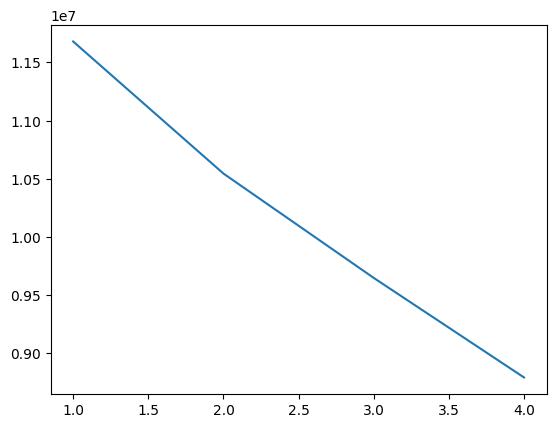

In [386]:
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [387]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11678917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10544471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9648093.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8792937.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7989517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7232156.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6541250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

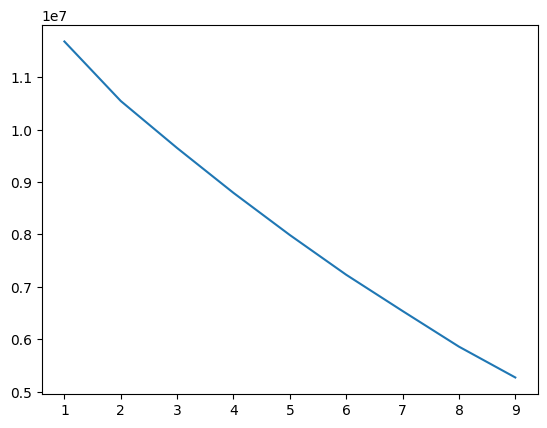

In [389]:
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)